## STEP-5 (Introducing learning rate)
    Target:

        -- In the last step, we saw that the training accuracy is increasing but the test accuracy is going up and down a little (which means the model is not able to find minima). So, we want to introduce learning rate scheduler now

    Results:

        -- Parameters: 7,330
        -- Best Training Accuracy: 99.05
        -- Best Test Accuracy: 99.29

    Analysis:

        -- The accuracy has dropped a little (from 99.40 to 99.29) after introducing learning rate scheduler.
        -- The test accuracy is more accurate now. We can still improve the model if we train it for few more epochs


# Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd 'drive/MyDrive/ERA_V1/Session_7_InDepth_Coding_Practice'

/content/drive/MyDrive/ERA_V1/Session_7_InDepth_Coding_Practice


In [3]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

# Data Transformations



In [4]:
from data_transformers import TransformsWithAugmentation
transforms_obj = TransformsWithAugmentation()
train = transforms_obj.download_train_data()
test = transforms_obj.download_test_data()

# Train Test Dataloaders




In [5]:
from train_test_loaders import Train_Test_Dataloaders
train_test_dataloaders_obj = Train_Test_Dataloaders()

train_loader = train_test_dataloaders_obj.get_train_dataloader(train)
test_loader = train_test_dataloaders_obj.get_test_dataloader(test)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# The Model

$$n_{out} = \lfloor \frac{n_{in} + 2p - k}{s} \rfloor + 1$$

$$j_{out} = j{_in}*s$$

$$r_{out} = r_{in} + (k-1)*j_{in}$$


**n_in:** number of input features

**n_out:** number of output features

**k:** kernel_size

**s:** stride

**p:** padding

**j_in:** jump in

**j_out:** jump out

**r_in:** in receptive field

**r_out:** out receptive field

In [6]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cuda


In [7]:
from models import Model3
model = Model3().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
              ReLU-2           [-1, 10, 26, 26]               0
       BatchNorm2d-3           [-1, 10, 26, 26]              20
           Dropout-4           [-1, 10, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             900
              ReLU-6           [-1, 10, 24, 24]               0
       BatchNorm2d-7           [-1, 10, 24, 24]              20
           Dropout-8           [-1, 10, 24, 24]               0
            Conv2d-9           [-1, 12, 22, 22]           1,080
             ReLU-10           [-1, 12, 22, 22]               0
      BatchNorm2d-11           [-1, 12, 22, 22]              24
          Dropout-12           [-1, 12, 22, 22]               0
           Conv2d-13           [-1, 14, 20, 20]           1,512
             ReLU-14           [-1, 14,

# Let's Train and test our model

In [8]:
from train_test import Train_Test_With_LR_Scheduler
train_test_obj = Train_Test_With_LR_Scheduler()

train_losses, test_losses, train_acc, test_acc = train_test_obj.train_and_test_model(model, device, 15, train_loader, test_loader)

EPOCH: 0


loss=0.10804017633199692 Batch_id=468 Accuracy=87.12: 100%|██████████| 469/469 [00:27<00:00, 16.88it/s]



 Test set: Average loss: 0.0920, Accuracy: 9750/10000 (97.50%)

EPOCH: 1


loss=0.0457153283059597 Batch_id=468 Accuracy=97.39: 100%|██████████| 469/469 [00:27<00:00, 17.09it/s]



 Test set: Average loss: 0.0565, Accuracy: 9842/10000 (98.42%)

EPOCH: 2


loss=0.03894231840968132 Batch_id=468 Accuracy=98.00: 100%|██████████| 469/469 [00:25<00:00, 18.11it/s]



 Test set: Average loss: 0.0479, Accuracy: 9859/10000 (98.59%)

EPOCH: 3


loss=0.10798611491918564 Batch_id=468 Accuracy=98.21: 100%|██████████| 469/469 [00:24<00:00, 18.90it/s]



 Test set: Average loss: 0.0417, Accuracy: 9886/10000 (98.86%)

EPOCH: 4


loss=0.03771262615919113 Batch_id=468 Accuracy=98.42: 100%|██████████| 469/469 [00:23<00:00, 19.91it/s]



 Test set: Average loss: 0.0351, Accuracy: 9899/10000 (98.99%)

EPOCH: 5


loss=0.03497257083654404 Batch_id=468 Accuracy=98.67: 100%|██████████| 469/469 [00:22<00:00, 20.57it/s]



 Test set: Average loss: 0.0308, Accuracy: 9912/10000 (99.12%)

EPOCH: 6


loss=0.06473603844642639 Batch_id=468 Accuracy=98.83: 100%|██████████| 469/469 [00:23<00:00, 19.59it/s]



 Test set: Average loss: 0.0262, Accuracy: 9922/10000 (99.22%)

EPOCH: 7


loss=0.052457209676504135 Batch_id=468 Accuracy=98.90: 100%|██████████| 469/469 [00:23<00:00, 19.55it/s]



 Test set: Average loss: 0.0249, Accuracy: 9922/10000 (99.22%)

EPOCH: 8


loss=0.009451709687709808 Batch_id=468 Accuracy=98.94: 100%|██████████| 469/469 [00:25<00:00, 18.14it/s]



 Test set: Average loss: 0.0241, Accuracy: 9927/10000 (99.27%)

EPOCH: 9


loss=0.0034190902952104807 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:22<00:00, 21.16it/s]



 Test set: Average loss: 0.0249, Accuracy: 9922/10000 (99.22%)

EPOCH: 10


loss=0.04614303633570671 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:22<00:00, 20.98it/s]



 Test set: Average loss: 0.0245, Accuracy: 9931/10000 (99.31%)

EPOCH: 11


loss=0.047527704387903214 Batch_id=468 Accuracy=99.01: 100%|██████████| 469/469 [00:23<00:00, 19.73it/s]



 Test set: Average loss: 0.0244, Accuracy: 9928/10000 (99.28%)

EPOCH: 12


loss=0.08658391237258911 Batch_id=468 Accuracy=99.01: 100%|██████████| 469/469 [00:23<00:00, 20.34it/s]



 Test set: Average loss: 0.0245, Accuracy: 9927/10000 (99.27%)

EPOCH: 13


loss=0.01758410967886448 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:21<00:00, 21.35it/s]



 Test set: Average loss: 0.0232, Accuracy: 9927/10000 (99.27%)

EPOCH: 14


loss=0.029562933370471 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:25<00:00, 18.71it/s]



 Test set: Average loss: 0.0232, Accuracy: 9929/10000 (99.29%)



# Accuracy and Loss Visualisation

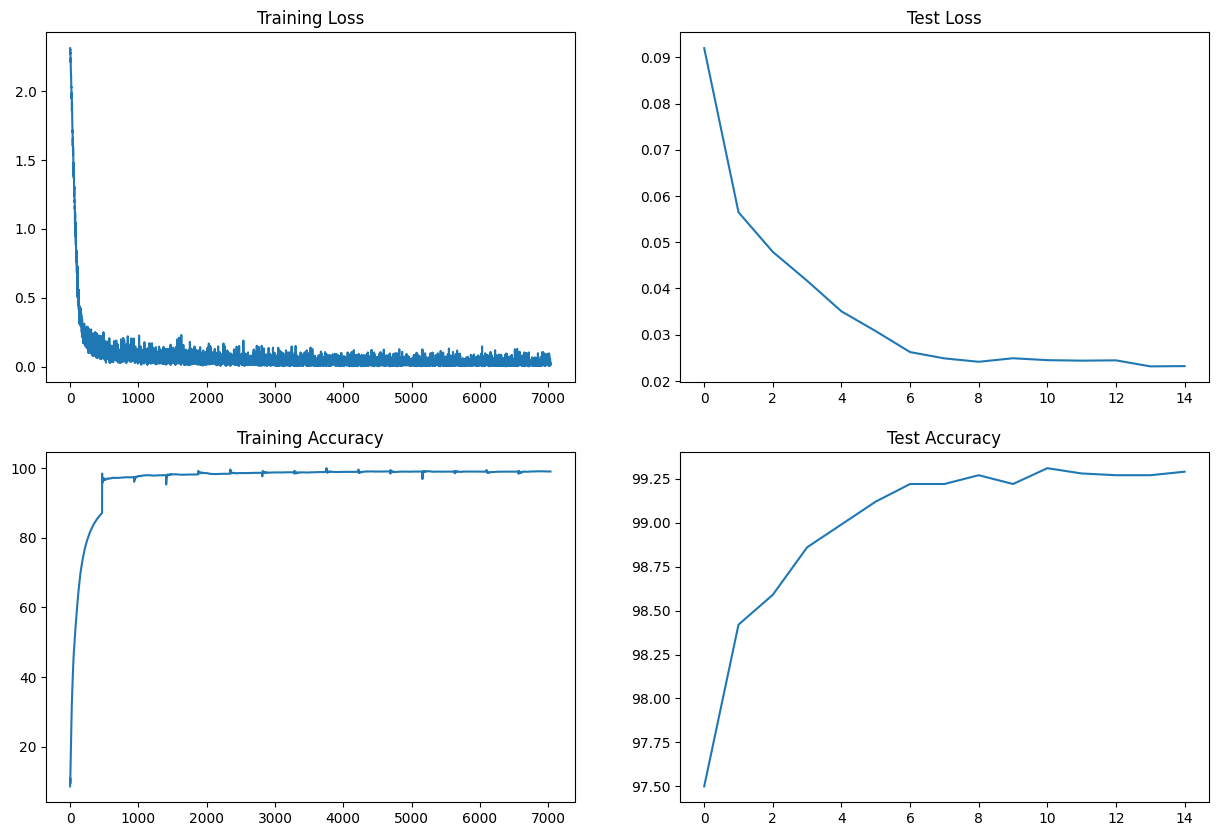

In [9]:
%matplotlib inline
from result_visualisation import Result_Visualisation
result_visualisation_obj = Result_Visualisation()
result_visualisation_obj.plot_accuracy_and_loss(train_losses, test_losses, train_acc, test_acc)